				  Welcome to our CryptoCompare API 

 1.Bitcoin BTC{₿} 
 2.Ethereum ETH{Ξ} 
 3.Ripple XRP{X}  

 0.Exit the program  


 Choose your currency: 
1
 
1.Daily rate
2.Minute-wise rate
3.Hourly rate 
 0.Go back
 
 Enter the duration of checking data: 
1
                   high       low      open  volumefrom      volumeto     Close  \
Date                                                                           
2023-03-21  28902.98  26676.69  27807.05   190158.59  5.329354e+09  28345.70   
2023-03-24  28421.94  27054.76  28345.70   101100.36  2.809651e+09  27995.16   
2023-03-27  28643.21  26551.46  27995.16   132380.62  3.650615e+09  28355.70   
2023-03-30  29171.13  27552.64  28355.70   119722.08  3.392758e+09  28468.49   
2023-04-02  28537.18  27292.30  28468.49    96233.24  2.701474e+09  28177.23   
...              ...       ...       ...         ...           ...       ...   
2023-12-31  45918.98  41970.37  42146.03    98452.19  4.349507e+09  44970.34   
2024-01-03  45513.73  40

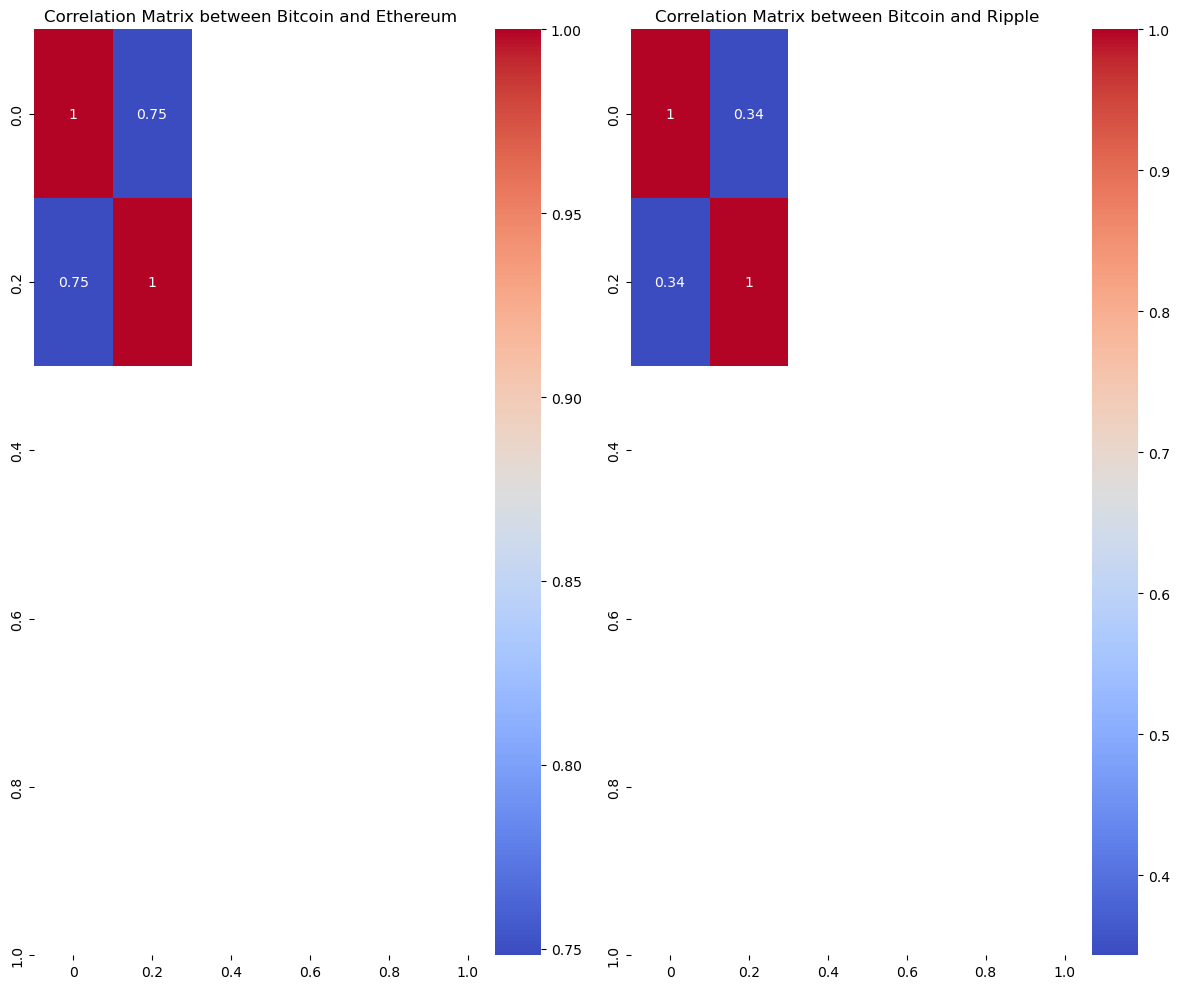

 
Bitcoin Analysis Results: 
 Mean Return: 0.004087247177000335
Median Return: 0.0014141172577709208
Standard Deviation of Return: 0.03720535014121507
Highest price among data: 46988.14
Date with Highest Return: 2024-01-06 00:00:00 
 

 1.Check highest prices
2.Analysis
3.Visualize your data
4.Save data into csv file 
 0.Go back 
 Menu:  
3


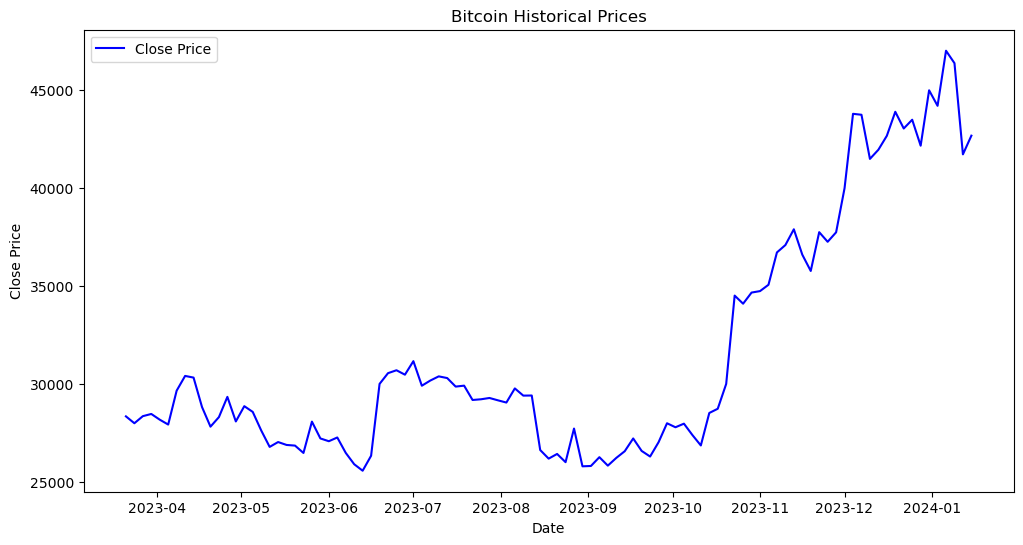

 1.Check highest prices
2.Analysis
3.Visualize your data
4.Save data into csv file 
 0.Go back 
 Menu:  


In [ ]:
import os
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ANSI escape codes for text formatting
class TextColors:
    RESET = "\033[0m"
    BOLD = "\033[1m"
    ITALIC = "\033[3m"

    # foreground colors
    BLACK = "\033[30m"
    RED = "\033[31m"
    GREEN = "\033[32m"
    YELLOW = "\033[33m"
    BLUE = "\033[34m"
    MAGENTA = "\033[35m"
    CYAN = "\033[36m"
    WHITE = "\033[37m"

    # background colors
    BGBLACK = "\033[40m"
    BGRED = "\033[41m"
    BGGREEN = "\033[42m"
    BGYELLOW = "\033[43m"
    BGBLUE = "\033[44m"
    BGMAGENTA = "\033[45m"
    BGCYAN = "\033[46m"
    BGWHITE = "\033[47m"

class CryptoCurrencyData:
    def __init__(self, name, symbol):   # constructor for setting up name and symbol of coin
        self.name = name        # for setting of name
        self.symbol = symbol    # for setting of symbol
        self.prices = None      # for setting up of prices in the analysis of data
        self.returns = None     # for log returns of data
        self.url = ''           # for urls of different coins and durations

    def scrape_data(self, url):  # for scraping data
        self.url = url
        response = requests.get(url)    # first getting request from the url(API)

        if response.status_code == 200:  # if the status code is 200, we are allowed to fetch data
            data = response.json()      # collecting data from the json file(API)
            if data['Response'] == 'Success':   # only collecting data which gives me Success
                self.prices = pd.DataFrame(data['Data']['Data'])    # creating a dataframe with Columns Data
                # used to_datetime for setting up of dates
                self.prices['time'] = pd.to_datetime(self.prices['time'], unit='s')  # otherwise time was like this:-> 17000433545
                self.prices.rename(columns={'time': 'Date', 'close': 'Close'}, inplace=True)  # renaming column time to Date and close to Close
            else:
                print(f"API Response: {data['Message']}")   # if the page does not give me access for fetching data, then just display the msg
        else:
            print(f"Error: {response.status_code}")     # if the website does not give me the permission, then print the status code
            # print(response.text)

    def clean_and_structure_data(self):
        if self.prices is not None:  # if the prices are empty tell me straight away
            self.prices['Date'] = pd.to_datetime(self.prices['Date'])  # setting datetime into a proper dataframe
            self.prices.set_index('Date', inplace=True)  # then setting it according to increasing date
            self.prices.sort_index(inplace=True)  # then sorting it for more clarification
            self.prices.dropna(inplace=True)  # taking care of null values if any
        print(TextColors.ITALIC, TextColors.BOLD, TextColors.GREEN, self.prices.head(100), TextColors.RESET)  # this is the data from the API
        # by default i have put the limit of printing 100 rows, we can get more

    def transform_data_to_returns(self):
        if self.prices is not None:  # this will transform our data to logarithmic standards
            self.returns = np.log(self.prices['Close'] / self.prices['Close'].shift(1))  # used shift to move the index by moving it in 1 period in
            # positive direction

    def perform_analysis(self):  # performed analysis
        mean_return = self.returns.mean()  # for calculating mean of data
        median_return = self.returns.median()  # for calculating median of data
        std_dev_return = self.returns.std()  # for calculating standard deviation of data
        highest_price_date = self.prices['Close'].idxmax()  # for getting maximum Close price date in data frame
        highest_price = self.prices.loc[highest_price_date, 'Close']  # for getting the highest price location in data frame
        # retuning all the information one by one
        return mean_return, median_return, std_dev_return, highest_price, highest_price_date,

    def plot_data(self, label=None):  # plotting data if required for data analysis
        if self.prices is not None:  # if data was fetched correctly
            plt.figure(figsize=(12, 6))  # for getting figure size
            plt.plot(self.prices.index, self.prices['Close'], label='Close Price', color='blue')  # for plotting
            plt.xlabel('Date')  # setting up labels for horizontal axis
            plt.ylabel('Close Price')  # setting up labels for vertical axis
            plt.title(f'{self.name} Historical Prices')  # setting up of title
            plt.legend()  # setting up of legend in the upper right corner
            plt.show()  # command for showing plotted graph

    def calculate_correlation_matrix(self, other_cryptocurrency_data, ax):  # for finding correlations between matrices of currencies
        if self.returns is not None and other_cryptocurrency_data.returns is not None:  # if both data frames are not empty
            returns_array_1 = self.returns.to_numpy()  # converting logarithmic returns to NumPy arrays
            returns_array_2 = other_cryptocurrency_data.returns.to_numpy()
            returns_array_1 = np.nan_to_num(returns_array_1)  # handling missing values by
            returns_array_2 = np.nan_to_num(returns_array_2)  # replacing them with zeros
            correlation_matrix = np.corrcoef(returns_array_1, returns_array_2)  # calculating the correlation matrix
            x_labels = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
            y_labels = [0., 0.2, 0.4, 0.6, 0.8, 1.0]
            # plotting the correlation matrix using a heatmap
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', xticklabels=x_labels, yticklabels=y_labels, ax=ax)
            ax.set_title(f'Correlation Matrix between {self.name} and {other_cryptocurrency_data.name}')
            return correlation_matrix

    def save_to_csv(self, filename='crypto_data.csv'):
        if self.prices is not None:
            try:
                self.prices.to_csv(filename)
                print(f"Data saved to {filename}")
            except Exception as e:
                print(f"Error saving data to CSV: {e}")
        else:
            print("No data to save. Fetch data using scrape_data first.")


currencies_names = ["Bitcoin", "Ethereum", "Ripple"]
currencies_symbol = ["BTC", "ETH", "XRP"]
bitcoin_data = CryptoCurrencyData("Bitcoin", "BTC")
ethereum_data = CryptoCurrencyData("Ethereum", "ETH")
ripple_data = CryptoCurrencyData("Ripple", "XRP")

# time = int(input('Enter the amount of data you want with minutes'))
# These are the API links for getting our data
# First up we have prices for 100 days
btc_url_daily = f"https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit=100&aggregate=3&e=CCCAGG"
eth_url_daily = f"https://min-api.cryptocompare.com/data/v2/histoday?fsym=ETH&tsym=USD&limit=100&aggregate=3&e=CCCAGG"
xrp_url_daily = f"https://min-api.cryptocompare.com/data/v2/histoday?fsym=XRP&tsym=USD&limit=100&aggregate=3&e=CCCAGG"

# Then comes prices for minutes for the time user wants
# The time frame consists of data with a duration of 3 minutes span
btc_url_minute = f"https://min-api.cryptocompare.com/data/v2/histominute?fsym=BTC&tsym=USD&limit=100&aggregate=3&e=CCCAGG"
eth_url_minute = f"https://min-api.cryptocompare.com/data/v2/histominute?fsym=ETH&tsym=USD&limit=100&aggregate=3&e=CCCAGG"
xrp_url_minute = f"https://min-api.cryptocompare.com/data/v2/histominute?fsym=XRP&tsym=USD&limit=100&aggregate=3&e=CCCAGG"

# Right after that, comes prices for hours for the time user wants
# The time frame consists of data with a duration of 3 hours span
btc_url_hour = f"https://min-api.cryptocompare.com/data/v2/histohour?fsym=BTC&tsym=USD&limit=100&aggregate=3&e=CCCAGG"
eth_url_hour = f"https://min-api.cryptocompare.com/data/v2/histohour?fsym=ETH&tsym=USD&limit=100&aggregate=3&e=CCCAGG"
xrp_url_hour = f"https://min-api.cryptocompare.com/data/v2/histohour?fsym=XRP&tsym=USD&limit=100&aggregate=3&e=CCCAGG"

while True:  # for choosing currency
    print('\t\t\t\t', TextColors.BGBLUE, 'Welcome to our CryptoCompare API', TextColors.RESET, end='\n' * 2)
    print(TextColors.YELLOW, '1.Bitcoin BTC{₿}', TextColors.RESET)
    print(TextColors.BLUE, '2.Ethereum ETH{Ξ}', TextColors.RESET)
    print(TextColors.BLACK, '3.Ripple XRP{X}', TextColors.RESET, '\n')
    print(TextColors.BOLD, '0.Exit the program', TextColors.RESET, '\n' * 2)
    print(TextColors.BGGREEN, 'Choose your currency:', TextColors.RESET)
    choice_currency = int(input(''))

    if choice_currency == 1:
        while True:
            print(TextColors.YELLOW, '\n1.Daily rate')
            print('2.Minute-wise rate')
            print('3.Hourly rate', TextColors.RESET)
            print(TextColors.BOLD, '0.Go back\n', TextColors.RESET)
            print(TextColors.BGGREEN, 'Enter the duration of checking data:', TextColors.RESET)
            time_duration = int(input(''))

            if time_duration == 1:      # scraping data by choice of hours, minutes or days
                bitcoin_data.scrape_data(btc_url_daily)
            elif time_duration == 2:
                bitcoin_data.scrape_data(btc_url_minute)
            elif time_duration == 3:
                bitcoin_data.scrape_data(btc_url_hour)
            elif time_duration == 0:
                break
            else:
                print('Please enter a valid option.')
                continue

            bitcoin_data.clean_and_structure_data()
            bitcoin_data.transform_data_to_returns()
            BTC_analysis = bitcoin_data.perform_analysis()

            while True:
                print(TextColors.GREEN, '1.Check highest prices')
                print('2.Analysis')
                print('3.Visualize your data')
                print('4.Save data into csv file', TextColors.RESET)
                print(TextColors.BOLD, '0.Go back', TextColors.RESET)
                print(TextColors.BGGREEN, 'Menu: ', TextColors.RESET)
                btc_choice = int(input(''))

                if btc_choice == 1:
                    print('Highest price in data frame:', BTC_analysis[4])
                elif btc_choice == 2:
                    # taking data for correlation of Bitcoin with two other currencies
                    bitcoin_data_minute = CryptoCurrencyData("Bitcoin", "BTC")
                    bitcoin_data_minute.scrape_data(btc_url_daily)
                    bitcoin_data_minute.clean_and_structure_data()
                    bitcoin_data_minute.transform_data_to_returns()

                    ethereum_data.scrape_data(eth_url_daily)
                    ethereum_data.clean_and_structure_data()
                    ethereum_data.transform_data_to_returns()

                    ripple_data.scrape_data(xrp_url_daily)
                    ripple_data.clean_and_structure_data()
                    ripple_data.transform_data_to_returns()

                    fig, axes = plt.subplots(1, 2, figsize=(12, 10))
                    correlation_matrix_btc_eth = bitcoin_data.calculate_correlation_matrix(ethereum_data, axes[0])
                    correlation_matrix_btc_xrp = bitcoin_data.calculate_correlation_matrix(ripple_data, axes[1])
                    plt.tight_layout()
                    plt.show()  # for displaying data for plotted graph

                    # Analysis for Mean, Median, Standard Deviation, Highest price in the dataframe and the time
                    print(TextColors.BGYELLOW, "\nBitcoin Analysis Results:", TextColors.RESET)
                    print(TextColors.YELLOW, "Mean Return:", BTC_analysis[0])
                    print("Median Return:", BTC_analysis[1])
                    print("Standard Deviation of Return:", BTC_analysis[2])
                    print("Highest price among data:", BTC_analysis[3])
                    print("Date with Highest Return:", BTC_analysis[4], '\n', TextColors.RESET, end='\n\n')
                elif btc_choice == 3:
                    bitcoin_data.plot_data()  # plot the Bitcoin data
                elif btc_choice == 4:
                    bitcoin_data.save_to_csv()  # save Bitcoin data to CSV file
                elif btc_choice == 0:
                    break
                else:
                    print('Please enter a valid option.')
                    continue

    elif choice_currency == 2:
        # Repeat the similar process for Ethereum
        while True:
            print(TextColors.BLUE, '\n1.Daily rate')
            print('2.Minute-wise rate')
            print('3.Hourly rate', TextColors.RESET)
            print(TextColors.BOLD, '0.Go back\n', TextColors.RESET)
            print(TextColors.BGGREEN, 'Enter the duration of checking data:', TextColors.RESET)
            time_duration = int(input(''))

            if time_duration == 1:
                ethereum_data.scrape_data(eth_url_daily)
            elif time_duration == 2:
                ethereum_data.scrape_data(eth_url_minute)
            elif time_duration == 3:
                ethereum_data.scrape_data(eth_url_hour)
            elif time_duration == 0:
                break
            else:
                print('Please enter a valid option.')
                continue

            ethereum_data.clean_and_structure_data()
            ethereum_data.transform_data_to_returns()
            ETH_analysis = ethereum_data.perform_analysis()

            while True:
                print(TextColors.GREEN, '1.Check highest prices')
                print('2.Analysis')
                print('3.Visualize your data')
                print('4.Save data into csv file', TextColors.RESET)
                print(TextColors.BOLD, '0.Go back', TextColors.RESET)
                print(TextColors.BGGREEN, 'Menu: ', TextColors.RESET)
                eth_choice = int(input(''))

                if eth_choice == 1:
                    print('Highest price in data frame:', ETH_analysis[4])
                elif eth_choice == 2:
                    # Similar to Bitcoin, calculate correlation with other currencies
                    ethereum_data_minute = CryptoCurrencyData("Ethereum", "ETH")
                    ethereum_data_minute.scrape_data(eth_url_daily)
                    ethereum_data_minute.clean_and_structure_data()
                    ethereum_data_minute.transform_data_to_returns()

                    bitcoin_data.scrape_data(btc_url_daily)
                    bitcoin_data.clean_and_structure_data()
                    bitcoin_data.transform_data_to_returns()

                    ripple_data.scrape_data(xrp_url_daily)
                    ripple_data.clean_and_structure_data()
                    ripple_data.transform_data_to_returns()

                    fig, axes = plt.subplots(1, 2, figsize=(12, 10))
                    correlation_matrix_eth_btc = ethereum_data.calculate_correlation_matrix(bitcoin_data, axes[0])
                    correlation_matrix_eth_xrp = ethereum_data.calculate_correlation_matrix(ripple_data, axes[1])
                    plt.tight_layout()
                    plt.show()

                    # Analysis for Ethereum
                    print(TextColors.BGYELLOW, "\nEthereum Analysis Results:", TextColors.RESET)
                    print(TextColors.BLUE, "Mean Return:", ETH_analysis[0])
                    print("Median Return:", ETH_analysis[1])
                    print("Standard Deviation of Return:", ETH_analysis[2])
                    print("Highest price among data:", ETH_analysis[3])
                    print("Date with Highest Return:", ETH_analysis[4], '\n', TextColors.RESET, end='\n\n')
                elif eth_choice == 3:
                    ethereum_data.plot_data()
                elif eth_choice == 4:
                    ethereum_data.save_to_csv()
                elif eth_choice == 0:
                    break
                else:
                    print('Please enter a valid option.')
                    continue

    elif choice_currency == 3:
        # Repeat the similar process for Ripple
        while True:
            print(TextColors.BLACK, '\n1.Daily rate')
            print('2.Minute-wise rate')
            print('3.Hourly rate', TextColors.RESET)
            print(TextColors.BOLD, '0.Go back\n', TextColors.RESET)
            print(TextColors.BGGREEN, 'Enter the duration of checking data:', TextColors.RESET)
            time_duration = int(input(''))

            if time_duration == 1:
                ripple_data.scrape_data(xrp_url_daily)
            elif time_duration == 2:
                ripple_data.scrape_data(xrp_url_minute)
            elif time_duration == 3:
                ripple_data.scrape_data(xrp_url_hour)
            elif time_duration == 0:
                break
            else:
                print('Please enter a valid option.')
                continue

            ripple_data.clean_and_structure_data()
            ripple_data.transform_data_to_returns()
            XRP_analysis = ripple_data.perform_analysis()

            while True:
                print(TextColors.GREEN, '1.Check highest prices')
                print('2.Analysis')
                print('3.Visualize your data')
                print('4.Save data into csv file', TextColors.RESET)
                print(TextColors.BOLD, '0.Go back', TextColors.RESET)
                print(TextColors.BGGREEN, 'Menu: ', TextColors.RESET)
                xrp_choice = int(input(''))

                if xrp_choice == 1:
                    print('Highest price in data frame:', XRP_analysis[4])
                elif xrp_choice == 2:
                    # Similar to Bitcoin, calculate correlation with other currencies
                    ripple_data_minute = CryptoCurrencyData("Ripple", "XRP")
                    ripple_data_minute.scrape_data(xrp_url_daily)
                    ripple_data_minute.clean_and_structure_data()
                    ripple_data_minute.transform_data_to_returns()

                    bitcoin_data.scrape_data(btc_url_daily)
                    bitcoin_data.clean_and_structure_data()
                    bitcoin_data.transform_data_to_returns()

                    ethereum_data.scrape_data(eth_url_daily)
                    ethereum_data.clean_and_structure_data()
                    ethereum_data.transform_data_to_returns()

                    fig, axes = plt.subplots(1, 2, figsize=(12, 10))
                    correlation_matrix_xrp_btc = ripple_data.calculate_correlation_matrix(bitcoin_data, axes[0])
                    correlation_matrix_xrp_eth = ripple_data.calculate_correlation_matrix(ethereum_data, axes[1])
                    plt.tight_layout()
                    plt.show()

                    # Analysis for Ripple
                    print(TextColors.BGYELLOW, "\nRipple Analysis Results:", TextColors.RESET)
                    print(TextColors.BLACK, "Mean Return:", XRP_analysis[0])
                    print("Median Return:", XRP_analysis[1])
                    print("Standard Deviation of Return:", XRP_analysis[2])
                    print("Highest price among data:", XRP_analysis[3])
                    print("Date with Highest Return:", XRP_analysis[4], '\n', TextColors.RESET, end='\n\n')
                elif xrp_choice == 3:
                    ripple_data.plot_data()
                elif xrp_choice == 4:
                    ripple_data.save_to_csv()
                elif xrp_choice == 0:
                    break
                else:
                    print('Please enter a valid option.')
                    continue

    elif choice_currency == 0:
        print('Exiting the program Allah Hafiz')
        break
    else:
        print('Please enter a valid option.')
        continue
